In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(
    "../../data/raw/SMSPhishing.csv",
    names=["label", "message", "url", "email", "phone"],
    encoding="utf-8",
)

In [3]:
df.shape

(5971, 5)

In [4]:
df.head()

,label,message,url,email,phone
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No


In [5]:
label_counts = df['label'].value_counts()
print("\nLabel distribution:")
print(label_counts)


Label distribution:
label
ham         4844
Smishing     616
spam         466
Spam          23
smishing      22
Name: count, dtype: int64


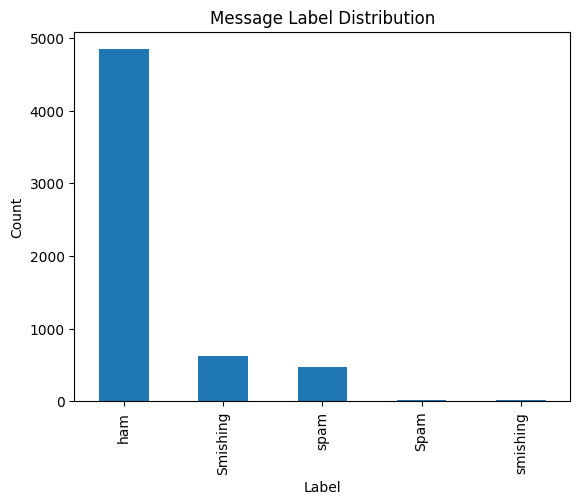

In [6]:
plt.figure()
label_counts.plot(kind='bar')
plt.title('Message Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [7]:
df['length'] = df['message'].apply(len)
print("\nMessage length statistics:")
print(df['length'].describe())


Message length statistics:
count    5971.000000
mean       83.239826
std        58.681945
min         2.000000
25%        38.000000
50%        66.000000
75%       127.000000
max       910.000000
Name: length, dtype: float64


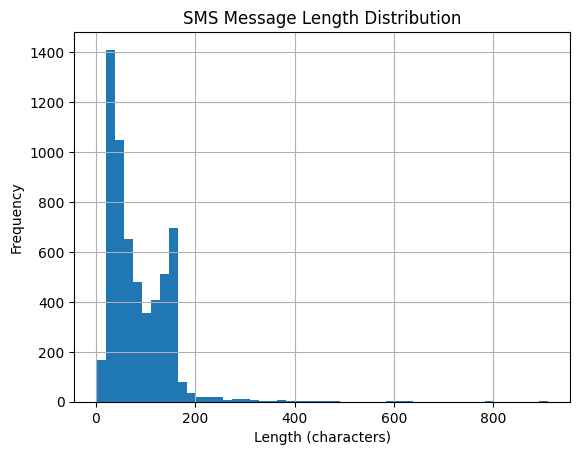

In [8]:
plt.figure()
df['length'].hist(bins=50)
plt.title('SMS Message Length Distribution')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.show()

In [9]:
length_by_label = df.groupby("label")["length"].mean()
print("Mean length by label:\n", length_by_label)


Mean length by label:
 label
Smishing    139.967532
Spam        153.347826
ham          70.704583
smishing    128.909091
spam        132.937768
Name: length, dtype: float64


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit a simple bag‐of‐words on all messages
all_messages = df["message"]
vect = CountVectorizer()
vect.fit(all_messages)

print("Total unique tokens in vocab:", len(vect.vocabulary_))

# Show top 20 most common tokens
token_counts = vect.transform(all_messages).sum(axis=0).A1
tokens = vect.get_feature_names_out()
top20_idx = token_counts.argsort()[::-1][:20]
print("Top 20 tokens:", tokens[top20_idx])


Total unique tokens in vocab: 9556
Top 20 tokens: ['to' 'you' 'the' 'and' 'is' 'in' 'your' 'for' 'me' 'call' 'my' 'it' 'of'
 'have' 'that' 'on' 'now' 'are' 'can' 'or']
